In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import umap
import scipy

/scratch/gpfs/rraghu/.conda/envs/cos513/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
mus = np.load("s2_allfeats_w512/mu.npy")
labels = np.load("s2_allfeats_w512/label.npy").astype(int)

In [15]:
labels = scipy.stats.mode(labels, axis=1).mode
mask = (labels <= 4)
mus = mus[mask, :]

In [17]:
reducer = umap.UMAP()
mus_umap = reducer.fit_transform(mus)

/scratch/gpfs/rraghu/.conda/envs/cos513/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipykernel_3095813/1981894103.py:4: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 8
  plt.legend(handles=scatter.legend_elements()[0], labels=label_names)


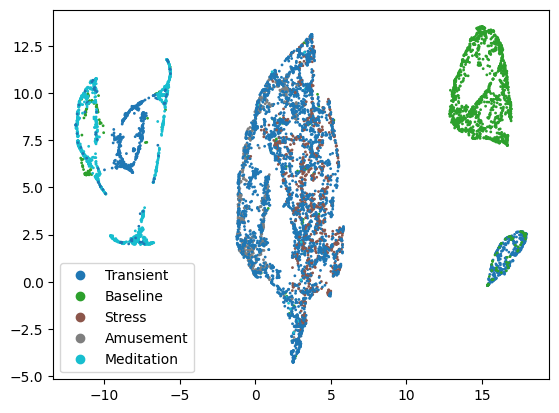

In [ ]:
label_names = ["Transient", "Baseline", "Stress", "Amusement", "Meditation", "Ignore", "Ignore", "Ignore"]
scatter = plt.scatter(mus_umap[:, 0], mus_umap[:, 1], c=labels[mask], s=1, alpha=1, cmap='tab10', label=label_names)
plt.legend(handles=scatter.legend_elements()[0], labels=label_names)